# **Alura Challenge - Alura Voz**

Nesse notebook será realizada a criação de modelos de Machine Learning para a empresa ALura Voz.

## **Semana 03 - Criação de modelos de Machine learning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings

In [ ]:
#np.random.seed(42)

In [ ]:
sns.set_theme(style="whitegrid", palette='Set2')

In [ ]:
# Ler os dados com pandas do arquivo json
dados = pd.read_json('/content/Customer-Churn-clean.json')

In [ ]:
dados.head(2)

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Daily_Expense,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,2.19,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,2.00,Mailed check,59.9,542.4


Na minha avaliação, a coluna Daily_Expense, criada na semana 1, não é interessante pois é altamente correlacionada com o gasto mensal. Logo, irei eliminá-la dos meus dados.

In [ ]:
dados.drop(columns='Daily_Expense', inplace=True)
dados.head(2)

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
dados.describe()

,Tenure,Charges_Monthly,Charges_Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Agora, irei reordenar as colunas para deixar as colunas tipo int64 e float64 por último e facilitar meu encoding.

In [ ]:
# Pegando os nomes das colunas
columns_names = dados.columns
print(columns_names)

Index(['customerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')


In [ ]:
# Reordenando
dados = dados[['customerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'Charges_Monthly',
       'Charges_Total']]
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   Gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Analisando a variável target **Churn** para ver o desbalanceamento.

Com o gráfico abaixo podemos perceber que há uma diferença muito grande na quantidade de clientes que deixaram e permanecem na empresa, ou seja, os dados estão muito desbalanceados.

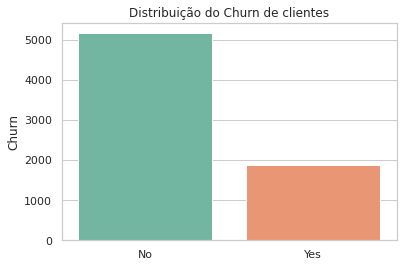

In [ ]:
plot = sns.barplot(x=dados['Churn'].value_counts().index, y=dados['Churn'].value_counts(), orient='v');
plot.set_title('Distribuição do Churn de clientes');
plot.grid(True, axis='y');

In [ ]:
print(f'{dados["Churn"].value_counts()["Yes"]/len(dados)*100:.2f}% dos clientes deixaram a empresa.')
print(f'{dados["Churn"].value_counts()["No"]/len(dados)*100:.2f}% dos clientes permanecem na empresa.')

26.58% dos clientes deixaram a empresa.
73.42% dos clientes permanecem na empresa.


### **Encoding dos dados**

Irei trabalhar primeiro no encoding dos dados para configurar as variáveis categóricas.

In [ ]:
# Separando a entrada
X = dados.iloc[:, 2:]
X.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Tenure,Charges_Monthly,Charges_Total
0,Female,No,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,9,65.6,593.30
1,Male,No,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,9,59.9,542.40
2,Male,No,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,4,73.9,280.85
3,Male,Yes,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,13,98.0,1237.85
4,Female,Yes,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,3,83.9,267.40


In [ ]:
# Separando o target
y = dados.iloc[:, 1]
y.head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Churn, dtype: object

### **Avaliações com os dados desbalanceados**

In [ ]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

Separei os dados com 15% para teste, pois irei usar **validação cruzada**. logo os dados de teste serão utilizados no teste final de cada análise. 

In [ ]:
print(f'Shape do X_train: {X_train.shape}')
print(f'Shape do y_train: {y_train.shape}')
print(f'Shape do X_test: {X_test.shape}')
print(f'Shape do y_test: {y_test.shape}')

Shape do X_train: (5977, 19)
Shape do y_train: (5977,)
Shape do X_test: (1055, 19)
Shape do y_test: (1055,)


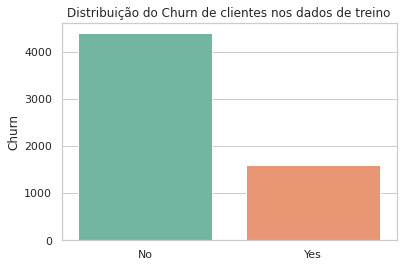

In [ ]:
plot = sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts(), orient='v');
plot.set_title('Distribuição do Churn de clientes nos dados de treino');
plot.grid(True, axis='y');

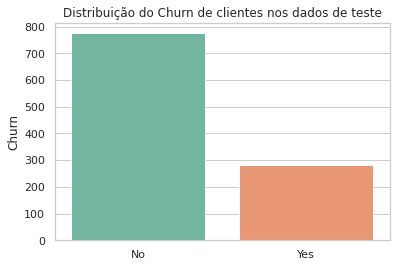

In [ ]:
plot = sns.barplot(x=y_test.value_counts().index, y=y_test.value_counts(), orient='v');
plot.set_title('Distribuição do Churn de clientes nos dados de teste');
plot.grid(True, axis='y');

Agora é preciso realizar os encoding dos dados.

Vou usar o [One Hoting Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) e [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) do Sklearn, pois consigo transformar os dados categóricos em uma matriz numérica e mapear a mesma representação para os dados de teste.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [ ]:
# Criando o encoder com drop=if_binary, para reduzir a quantidade total de colunas no hot_encoder
X_enc = OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore', dtype=int)
X_enc.fit(X_train.iloc[:, :-3])

OneHotEncoder(drop='if_binary', dtype=<class 'int'>, handle_unknown='ignore',
              sparse=False)

In [ ]:
# Categorias codificadas
X_enc.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [ ]:
# Nomes das novas características que serão mapeadas paras as colunas
X_enc_names = X_enc.get_feature_names_out()
X_enc_names

array(['Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automa

In [ ]:
# Mapeando as colunas codificadas para o X
X_train_enc = pd.DataFrame(X_enc.transform(X_train.iloc[:, :-3]), columns=X_enc_names)
X_train_enc

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,1,1,0,0,1,0,1,...,0,1,1,0,0,1,1,0,0,0
2,1,0,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,1,1,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,1,0,0,0,1,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
5973,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
5974,1,1,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5975,1,0,0,0,1,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
# Adicionando as colunas numéricas
for column in X_train.columns[-3:]:
  X_train_enc[column] = X_train[column].to_numpy()

In [ ]:
X_train_enc

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,Charges_Monthly,Charges_Total
0,1,1,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,55,60.00,3316.10
1,1,0,0,1,1,0,0,1,0,1,...,0,0,1,1,0,0,0,33,95.30,3275.15
2,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,1,54.35,54.35
3,1,0,1,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,52,19.20,1054.75
4,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,2,45.85,105.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,2,19.65,38.80
5973,1,0,0,0,1,1,0,0,0,1,...,1,0,1,0,0,1,0,41,89.55,3729.75
5974,1,1,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,27,70.55,1943.90
5975,1,0,0,0,1,0,0,1,0,1,...,1,0,1,0,1,0,0,65,110.00,7138.65


In [ ]:
# Realizando o processo para X_test
X_test_enc = pd.DataFrame(X_enc.transform(X_test.iloc[:, :-3]), columns=X_enc_names)

for column in X_test.columns[-3:]:
  X_test_enc[column] = X_test[column].to_numpy()

X_test_enc

,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure,Charges_Monthly,Charges_Total
0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,5,75.60,402.50
1,0,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,50,108.75,5431.90
2,0,0,0,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,2,49.40,106.55
3,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,29,76.00,2215.25
4,0,0,0,1,1,1,0,0,0,1,...,0,0,1,1,0,0,0,4,98.10,396.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,16,20.60,330.25
1051,1,0,1,0,1,0,0,1,1,0,...,0,1,1,1,0,0,0,61,80.80,4860.85
1052,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,2,44.35,81.25
1053,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,3,75.80,246.30


In [ ]:
# Criando o encoding para y: [No -> 0] [Yes -> 1]
lb = LabelBinarizer()

In [ ]:
# Encoding do y_train
y_train_enc = lb.fit_transform(y_train)
y_train_enc

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Nomes das classes
lb_names = lb.classes_
lb_names

array(['No', 'Yes'], dtype='<U3')

In [ ]:
# Encoding do y_test
y_test_enc = lb.transform(y_test)
y_test_enc

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

#### **Definindo um baseline**

Vou criar um modelo base com o dummy classifier para ter uma base de comparação.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

In [ ]:
# Modelo dummy com estratégia de predição estratificada por classe
dummy_churn = DummyClassifier(strategy='stratified')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipe_dummy = Pipeline([('MinMaxScaler', MinMaxScaler()), ('dummy', dummy_churn)])

In [ ]:
# Realizando a validação cruzada
dummy_churn_cv = cross_validate(pipe_dummy, X_train_enc, y_train_enc, cv=5, scoring=['accuracy', 'recall', 'precision', 'f1_weighted'], return_estimator=True)

In [ ]:
dummy_churn_cv

{'estimator': [Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))]),
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))]),
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))]),
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))]),
  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                  ('dummy', DummyClassifier(strategy='stratified'))])],
 'fit_time': array([0.03500676, 0.02280283, 0.01485753, 0.01335955, 0.01336026]),
 'score_time': array([0.03162622, 0.01118851, 0.0103898 , 0.01090288, 0.01046443]),
 'test_accuracy': array([0.60869565, 0.62374582, 0.59497908, 0.59832636, 0.6125523 ]),
 'test_f1_weighted': array([0.60908589, 0.62764893, 0.59288044, 0.5970983 , 0.61116645]),
 'test_precision': array([0.

In [ ]:
print(f'Acurácia média: {dummy_churn_cv["test_accuracy"].mean():.4f}')
print(f'Precisão média: {dummy_churn_cv["test_precision"].mean():.4f}')
print(f'Revocação média: {dummy_churn_cv["test_recall"].mean():.4f}')
print(f'F1-Score médio: {dummy_churn_cv["test_f1_weighted"].mean():.4f}')

Acurácia média: 0.6077
Precisão média: 0.2614
Revocação média: 0.2624
F1-Score médio: 0.6076


Com o resultado da validação cruzada temos observações interessantes sobre o modelo. 

Percebemos que há uma acurácia média de 60%, com revocação e precisão muito baixa, em torno de 26% para a classe positiva. Podemos perceber também que há um desbalanço nos resultados, pois o F1-Score é de 60%.


A seguir, irei prever os dados de testes com um dos modelos para ver se o mesmo padrão acontece e validar a análise anterior do desbalanço.

In [ ]:
# Verificar o modelo com o pipeline
dummy_churn_cv['estimator'][0]

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('dummy', DummyClassifier(strategy='stratified'))])

In [ ]:
# Predict do modelo dummy 0
y_pred_cv = dummy_churn_cv['estimator'][0].predict(X_test_enc)

In [ ]:
# Score do modelo dummy 0
dummy_churn_cv['estimator'][0].score(X_test_enc, y_test_enc)

0.6161137440758294

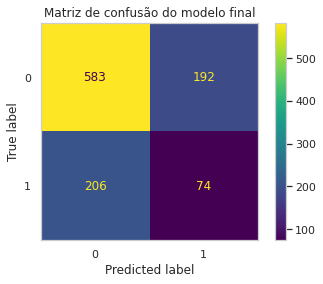

In [ ]:
# Mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_enc, y_pred_cv)

cm_disp = ConfusionMatrixDisplay(cm, display_labels=dummy_churn_cv['estimator'][0].classes_)

cm_disp.plot()

plt.title('Matriz de confusão do modelo final')
plt.grid(False)

plt.show()

Temos **62%** de acurácia.

Vamos ver o report de classificação que nos dá as métricas de **revocação**, **precisão** e **f1-score**.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predict_report = classification_report(y_test_enc, y_pred_cv, output_dict=True)
print(classification_report(y_test_enc, y_pred_cv, output_dict=False))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       775
           1       0.28      0.26      0.27       280

    accuracy                           0.62      1055
   macro avg       0.51      0.51      0.51      1055
weighted avg       0.62      0.62      0.62      1055



É possível ver que o modelo é muito ruim em predizer a classe de positiva, **churn = Yes**, com um recall de 32%. Mas possui um recall de 75% para a classe ne gativa, **churn = No**. 

Como há muito mais dado da classe negativa, olhar apenas o resultado final de acurácia não nos ajuda muito, pois ele é um valor que nos engana.

O padrão se parece com o resultado da validação cruzada, há um desbalanço entre os resultados. Como queremos os cliente que abandonam o plano, ou seja, a **classe positiva**, o resultado não é bom.

#### **Criando os modelos para os dados desbalanceados**

Vou constuir uma função para treino com validação cruzada e disposição de informações para o usuário. Irei avaliar as métricas de precisão, recall e f1-score macro para as duas classes.

Os modelos escolhidos para avaliação são: SVC, Random Forest e Bauve Bayes.

In [ ]:
def validacao_cruzada(modelo, nome, X_cv, y_cv, cv):

  warnings.filterwarnings('ignore')

  modelo_cv = cross_validate(modelo, X_cv, y_cv, cv=cv, scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], return_estimator=True)

  print('*****************************************************************************')
  print(f'*      Resultados do treino com validação cruzada para o {nome}')
  print('*****************************************************************************')
  print(f'* Acurácia: {modelo_cv["test_accuracy"]}')
  print(f'* Acurácia média: {modelo_cv["test_accuracy"].mean():.4f}')
  print('*-----------------------------------------------------------------------------')
  print(f'* Precisão: {modelo_cv["test_precision"]}')
  print(f'* Precisão média: {modelo_cv["test_precision"].mean():.4f}')
  print('*-----------------------------------------------------------------------------')
  print(f'* Revocação: {modelo_cv["test_recall"]}')
  print(f'* Revocação média: {modelo_cv["test_recall"].mean():.4f}')
  print('*-----------------------------------------------------------------------------')
  print(f'* F1_Score: {modelo_cv["test_f1_macro"]}')
  print(f'* F1_Score médio: {modelo_cv["test_f1_macro"].mean():.4f}')
  print('*-----------------------------------------------------------------------------')
  print(f'* ROC AUC: {modelo_cv["test_roc_auc"]}')
  print(f'* ROC AUC médio: {modelo_cv["test_roc_auc"].mean():.4f}')
  print('*****************************************************************************')

  return modelo_cv

In [ ]:
def teste_melhor_modelo(modelo, nome, X_test, y_test):

  warnings.filterwarnings('ignore')

  pred_dict = {'0':{'precision':[], 'recall':[], 'f1-score':[]},
               '1':{'precision':[], 'recall':[], 'f1-score':[]}}

  for i in range(len(modelo['estimator'])):
    y_pred_cv = modelo['estimator'][i].predict(X_test)
    
    
    predict_report = classification_report(y_test, y_pred_cv, output_dict=True)

    pred_dict['0']['f1-score'].append(predict_report['0']['f1-score'])
    pred_dict['0']['precision'].append(predict_report['0']['precision'])
    pred_dict['0']['recall'].append(predict_report['0']['recall'])
    pred_dict['1']['f1-score'].append(predict_report['1']['f1-score'])
    pred_dict['1']['precision'].append(predict_report['1']['precision'])
    pred_dict['1']['recall'].append(predict_report['1']['recall'])

    print('*****************************************************************************')
    print(f'classification report para o modelo {nome} {i+1}:')
    print('*****************************************************************************')
    print(classification_report(y_test, y_pred_cv, output_dict=False))
    print('*****************************************************************************')
    print(' ')

  return None

In [ ]:
# Importando o SVC e criando o modelo
from sklearn.svm import SVC
svc = SVC()

pipe_SVC = Pipeline([('MinMaxScaler', MinMaxScaler()), ('svc', svc)])

# treinando o modelo com a função criada
modelo_svc = validacao_cruzada(pipe_SVC, 'SVC', X_train_enc, y_train_enc.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o SVC
*****************************************************************************
* Acurácia: [0.79347826 0.79598662 0.78912134 0.78828452 0.81506276]
* Acurácia média: 0.7964
*-----------------------------------------------------------------------------
* Precisão: [0.65236052 0.65546218 0.63052209 0.65258216 0.67896679]
* Precisão média: 0.6540
*-----------------------------------------------------------------------------
* Revocação: [0.47798742 0.49056604 0.49526814 0.43710692 0.57861635]
* Revocação média: 0.4959
*-----------------------------------------------------------------------------
* F1_Score: [0.70877896 0.71412674 0.70830621 0.69372291 0.75103909]
* F1_Score médio: 0.7152
*-----------------------------------------------------------------------------
* ROC AUC: [0.79979871 0.79377624 0.80337266 0.78682867 0.80519639]
* ROC AUC médio: 0.79

**Pode ser verificado que o SVC não performa bem com os dados desbalanceados. A revocação e precisão da classe positiva não tão boa. O desequilíbrio nos resultados permanece entre as classes.**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

pipe_RF = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RF', RF)])

modelo_RF = validacao_cruzada(pipe_RF, 'RF', X_train_enc, y_train_enc.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.78344482 0.79264214 0.78912134 0.7916318  0.79079498]
* Acurácia média: 0.7895
*-----------------------------------------------------------------------------
* Precisão: [0.61389961 0.64344262 0.62948207 0.66197183 0.62878788]
* Precisão média: 0.6355
*-----------------------------------------------------------------------------
* Revocação: [0.5        0.49371069 0.49842271 0.44339623 0.52201258]
* Revocação média: 0.4915
*-----------------------------------------------------------------------------
* F1_Score: [0.7042134  0.71159987 0.70901424 0.69856523 0.7160862 ]
* F1_Score médio: 0.7079
*-----------------------------------------------------------------------------
* ROC AUC: [0.81852516 0.82106453 0.82800026 0.81668495 0.83925869]
* ROC AUC médio: 0.824

**O Random Forest apresenta um resultado melhor com F1-Score médio de 0.7 e revocação 0.5 para a classe positiva, ou seja, ainda há um desequilíbrio nos resultados.**

In [ ]:
# Naive Bayes GaussianNB

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

pipe_NB = Pipeline([('MinMaxScaler', MinMaxScaler()), ('NB', NB)])

modelo_NB = validacao_cruzada(pipe_NB, 'NB', X_train_enc, y_train_enc.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o NB
*****************************************************************************
* Acurácia: [0.70401338 0.70652174 0.67949791 0.68535565 0.68953975]
* Acurácia média: 0.6930
*-----------------------------------------------------------------------------
* Precisão: [0.46864111 0.47100176 0.44463087 0.44821429 0.45732689]
* Precisão média: 0.4580
*-----------------------------------------------------------------------------
* Revocação: [0.84591195 0.8427673  0.83596215 0.78930818 0.89308176]
* Revocação média: 0.8414
*-----------------------------------------------------------------------------
* F1_Score: [0.68356951 0.68553076 0.66059721 0.66153837 0.67460655]
* F1_Score médio: 0.6732
*-----------------------------------------------------------------------------
* ROC AUC: [0.82197963 0.82328871 0.80782428 0.79654231 0.84049755]
* ROC AUC médio: 0.818

**O Naive Bayes aparenta ser um algoritmo melhor nessa situação, pois possui um F1-Score médio de 0.67 e revocação para a classe 0.84. Aqui pode ser percebido umam melhora na revocação mas a precisão ainda é baixa em torno de 0.46.**

**Olhando apenas para o F1-Score o Random Forest parece ser um pouco mais equilibrado.**

### **Avaliações com os dados balanceados**

Agora irei testar as opções de balanceamento de dados para os treinar os modelos.

Com a biblioteca [imblearn](https://imbalanced-learn.org/stable/) testarei 4 opções de balanceamento, 2 opções de under sampling e 2 de over sampling:

1. Random under-sampling
2. TomekLinks
3. Random over-sampling
4. SMOTE

#### **Balanceamento com Random Under Sampling**

In [ ]:
# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_resample(X_train_enc, y_train_enc)

print(f'Shape do X_train com Under Sampling: {X_train_rus.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_rus.shape}')

print(f'Valores únicos das classes: {np.unique(y_train_rus, return_counts=True)}')

Shape do X_train com Under Sampling: (3178, 40)
Shape do y_train com Under Sampling: (3178,)
Valores únicos das classes: (array([0, 1]), array([1589, 1589]))


In [ ]:
# Criação e treino do modeo SVC
svc = SVC()
pipe_SVC = Pipeline([('MinMaxScaler', MinMaxScaler()), ('svc', svc)])
modelo_svc_rus = validacao_cruzada(pipe_SVC, 'SVC', X_train_rus, y_train_rus.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o SVC
*****************************************************************************
* Acurácia: [0.75943396 0.75       0.74528302 0.73858268 0.8015748 ]
* Acurácia média: 0.7590
*-----------------------------------------------------------------------------
* Precisão: [0.73913043 0.73313783 0.72543353 0.72809668 0.78571429]
* Precisão média: 0.7423
*-----------------------------------------------------------------------------
* Revocação: [0.80188679 0.78616352 0.78930818 0.76025237 0.83018868]
* Revocação média: 0.7936
*-----------------------------------------------------------------------------
* F1_Score: [0.75899962 0.74967262 0.74478836 0.73847307 0.801397  ]
* F1_Score médio: 0.7587
*-----------------------------------------------------------------------------
* ROC AUC: [0.83512322 0.81741229 0.81001543 0.80742218 0.86631748]
* ROC AUC médio: 0.82

In [ ]:
# Criação e treino do modeo Random Forest
RF = RandomForestClassifier()
pipe_RF = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RF', RF)])
modelo_RF_rus = validacao_cruzada(pipe_RF, 'RF', X_train_rus, y_train_rus.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.75471698 0.76100629 0.75786164 0.76220472 0.78110236]
* Acurácia média: 0.7634
*-----------------------------------------------------------------------------
* Precisão: [0.753125   0.75       0.73837209 0.759375   0.76876877]
* Precisão média: 0.7539
*-----------------------------------------------------------------------------
* Revocação: [0.75786164 0.78301887 0.79874214 0.76656151 0.80503145]
* Revocação média: 0.7822
*-----------------------------------------------------------------------------
* F1_Score: [0.75471456 0.76089043 0.75745629 0.76220237 0.7809633 ]
* F1_Score médio: 0.7632
*-----------------------------------------------------------------------------
* ROC AUC: [0.83165223 0.81970155 0.82257921 0.82299169 0.86898101]
* ROC AUC médio: 0.833

In [ ]:
# Criação e treino do modeo Naive Bayes
NB = GaussianNB()
pipe_NB = Pipeline([('MinMaxScaler', MinMaxScaler()), ('NB', NB)])
modelo_NB_rus = validacao_cruzada(pipe_NB, 'NB', X_train_rus, y_train_rus.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o NB
*****************************************************************************
* Acurácia: [0.73899371 0.74842767 0.72012579 0.69291339 0.78110236]
* Acurácia média: 0.7363
*-----------------------------------------------------------------------------
* Precisão: [0.6928934  0.70572917 0.67676768 0.65885417 0.72773537]
* Precisão média: 0.6924
*-----------------------------------------------------------------------------
* Revocação: [0.85849057 0.85220126 0.8427673  0.79810726 0.89937107]
* Revocação média: 0.8502
*-----------------------------------------------------------------------------
* F1_Score: [0.73521268 0.74568901 0.71585193 0.68955973 0.77792119]
* F1_Score médio: 0.7328
*-----------------------------------------------------------------------------
* ROC AUC: [0.81408963 0.80945176 0.79826747 0.78784001 0.86178402]
* ROC AUC médio: 0.814

**Com o Random Under Sampling é possível perceber um equilíbrio nos resultados e o Random Forest apresenta o melhor F1-Score e ROC_AUC macro para as duas classes. Porém, o Recall do Naive Bayes é maior para a classe positiva.**

#### **Balanceamento com TomekLinks**

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_train_tl, y_train_tl = tl.fit_resample(X_train_enc, y_train_enc)

print(f'Shape do X_train com Under Sampling: {X_train_tl.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_tl.shape}')

print(f'Valores únicos das classes: {np.unique(y_train_tl, return_counts=True)}')

Shape do X_train com Under Sampling: (5483, 40)
Shape do y_train com Under Sampling: (5483,)
Valores únicos das classes: (array([0, 1]), array([3894, 1589]))


In [ ]:
svc = SVC()
pipe_SVC = Pipeline([('MinMaxScaler', MinMaxScaler()), ('svc', svc)])
modelo_svc_tl = validacao_cruzada(pipe_SVC, 'SVC', X_train_tl, y_train_tl.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o SVC
*****************************************************************************
* Acurácia: [0.8094804  0.80856882 0.80127621 0.79835766 0.8229927 ]
* Acurácia média: 0.8081
*-----------------------------------------------------------------------------
* Precisão: [0.6996337  0.70769231 0.68382353 0.68461538 0.7       ]
* Precisão média: 0.6952
*-----------------------------------------------------------------------------
* Revocação: [0.60062893 0.57861635 0.58490566 0.5615142  0.68238994]
* Revocação média: 0.6016
*-----------------------------------------------------------------------------
* F1_Score: [0.75799078 0.75336385 0.74729913 0.74007115 0.78352094]
* F1_Score médio: 0.7564
*-----------------------------------------------------------------------------
* ROC AUC: [0.83260268 0.82993638 0.83293571 0.82599831 0.83758145]
* ROC AUC médio: 0.83

**Pode ser obsevado que o método TomeLinks não equilibra as classes deixando 50% - 50%.**

**O resultado também apresenta um desbalanço entre as classes.**

In [ ]:
RF = RandomForestClassifier()
pipe_RF = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RF', RF)])
modelo_RF_tl = validacao_cruzada(pipe_RF, 'RF', X_train_tl, y_train_tl.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.80309936 0.81403829 0.80127621 0.80109489 0.81386861]
* Acurácia média: 0.8067
*-----------------------------------------------------------------------------
* Precisão: [0.68085106 0.71755725 0.68518519 0.68821293 0.70212766]
* Precisão média: 0.6948
*-----------------------------------------------------------------------------
* Revocação: [0.60377358 0.59119497 0.58176101 0.57097792 0.62264151]
* Revocação média: 0.5941
*-----------------------------------------------------------------------------
* F1_Score: [0.75224592 0.76094091 0.74675536 0.7444511  0.76592965]
* F1_Score médio: 0.7541
*-----------------------------------------------------------------------------
* ROC AUC: [0.84861458 0.85596152 0.86167559 0.85002005 0.86921796]
* ROC AUC médio: 0.857

In [ ]:
NB = GaussianNB()
pipe_NB = Pipeline([('MinMaxScaler', MinMaxScaler()), ('NB', NB)])
modelo_NB_tl = validacao_cruzada(pipe_NB, 'NB', X_train_tl, y_train_tl.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o NB
*****************************************************************************
* Acurácia: [0.72288058 0.72926162 0.71103008 0.71624088 0.72080292]
* Acurácia média: 0.7200
*-----------------------------------------------------------------------------
* Precisão: [0.51320755 0.52023121 0.50093809 0.5060241  0.51075269]
* Precisão média: 0.5102
*-----------------------------------------------------------------------------
* Revocação: [0.85534591 0.8490566  0.83962264 0.79495268 0.89622642]
* Revocação média: 0.8470
*-----------------------------------------------------------------------------
* F1_Score: [0.70782753 0.71314807 0.69572917 0.6962758  0.70908107]
* F1_Score médio: 0.7044
*-----------------------------------------------------------------------------
* ROC AUC: [0.8394208  0.84301556 0.83126448 0.81412512 0.86093596]
* ROC AUC médio: 0.837

**Os resultados de Recall e F1-Score dos modelos não são melhores do que os resultados com balanceamento com Random Under Sampling.**

#### **Balanceamento com Random Over Sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_train_ros, y_train_ros = ros.fit_resample(X_train_enc, y_train_enc)

print(f'Shape do X_train com Under Sampling: {X_train_ros.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_ros.shape}')

print(f'Valores únicos das classes: {np.unique(y_train_ros, return_counts=True)}')

Shape do X_train com Under Sampling: (8776, 40)
Shape do y_train com Under Sampling: (8776,)
Valores únicos das classes: (array([0, 1]), array([4388, 4388]))


In [ ]:
svc = SVC()
pipe_SVC = Pipeline([('MinMaxScaler', MinMaxScaler()), ('svc', svc)])
modelo_svc_ros = validacao_cruzada(pipe_SVC, 'SVC', X_train_ros, y_train_ros.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o SVC
*****************************************************************************
* Acurácia: [0.78132118 0.78461538 0.76239316 0.7988604  0.76695157]
* Acurácia média: 0.7788
*-----------------------------------------------------------------------------
* Precisão: [0.7702407  0.76972973 0.73958333 0.78074866 0.74300518]
* Precisão média: 0.7607
*-----------------------------------------------------------------------------
* Revocação: [0.80182232 0.81185861 0.80957811 0.83143508 0.8166287 ]
* Revocação média: 0.8143
*-----------------------------------------------------------------------------
* F1_Score: [0.78122924 0.7844608  0.76187331 0.79864047 0.76636414]
* F1_Score médio: 0.7785
*-----------------------------------------------------------------------------
* ROC AUC: [0.85628318 0.85435049 0.84938494 0.87136139 0.85049272]
* ROC AUC médio: 0.85

In [ ]:
RF = RandomForestClassifier()
pipe_RF = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RF', RF)])
modelo_RF_ros = validacao_cruzada(pipe_RF, 'RF', X_train_ros, y_train_ros.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.88724374 0.88262108 0.90769231 0.92877493 0.91623932]
* Acurácia média: 0.9045
*-----------------------------------------------------------------------------
* Precisão: [0.84907598 0.8565356  0.84541063 0.87537388 0.85658537]
* Precisão média: 0.8566
*-----------------------------------------------------------------------------
* Revocação: [0.94191344 0.91904219 0.9977195  1.         1.        ]
* Revocação média: 0.9717
*-----------------------------------------------------------------------------
* F1_Score: [0.88690572 0.88246963 0.90694762 0.9284059  0.91563937]
* F1_Score médio: 0.9041
*-----------------------------------------------------------------------------
* ROC AUC: [0.95736842 0.95417763 0.98443973 0.98684166 0.98068911]
* ROC AUC médio: 0.972

In [ ]:
NB = GaussianNB()
pipe_NB = Pipeline([('MinMaxScaler', MinMaxScaler()), ('NB', NB)])
modelo_NB_ros = validacao_cruzada(pipe_NB, 'NB', X_train_ros, y_train_ros.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o NB
*****************************************************************************
* Acurácia: [0.74715262 0.74472934 0.73048433 0.75726496 0.72535613]
* Acurácia média: 0.7410
*-----------------------------------------------------------------------------
* Precisão: [0.70549242 0.70293283 0.68669131 0.7096475  0.68333333]
* Precisão média: 0.6976
*-----------------------------------------------------------------------------
* Revocação: [0.84851936 0.84720639 0.84720639 0.87129841 0.8405467 ]
* Revocação média: 0.8510
*-----------------------------------------------------------------------------
* F1_Score: [0.74452759 0.74204589 0.72679287 0.75403866 0.72163171]
* F1_Score médio: 0.7378
*-----------------------------------------------------------------------------
* ROC AUC: [0.82014544 0.82341306 0.81145407 0.83261624 0.80619956]
* ROC AUC médio: 0.818

**Os resultados com Random Over Sampling apresentam resultados interessantes e o Random Forest parece ser o mais equilibrado com F1-Score médio de 0.90 e alta revocação e precisão para a classe positiva.**

**O SVC apresenta resultados abaixo do Random Forest e o Naive Bayes sofre mais na precisão da classe positiva. O F1-Score é em torno de 0.73, bem diferente do Random Forest.**

#### **Balanceamento com SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train_enc, y_train_enc)

print(f'Shape do X_train com Under Sampling: {X_train_smote.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_smote.shape}')

print(f'Valores únicos das classes: {np.unique(y_train_smote, return_counts=True)}')

Shape do X_train com Under Sampling: (8776, 40)
Shape do y_train com Under Sampling: (8776,)
Valores únicos das classes: (array([0, 1]), array([4388, 4388]))


In [ ]:
svc = SVC()
pipe_SVC = Pipeline([('MinMaxScaler', MinMaxScaler()), ('svc', svc)])
modelo_svc_smote = validacao_cruzada(pipe_SVC, 'SVC', X_train_smote, y_train_smote.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o SVC
*****************************************************************************
* Acurácia: [0.67824601 0.74358974 0.89458689 0.90940171 0.8951567 ]
* Acurácia média: 0.8242
*-----------------------------------------------------------------------------
* Precisão: [0.85011186 0.86247878 0.84949495 0.87331256 0.85553279]
* Precisão média: 0.8582
*-----------------------------------------------------------------------------
* Revocação: [0.43280182 0.57924743 0.95895097 0.95785877 0.95102506]
* Revocação média: 0.7760
*-----------------------------------------------------------------------------
* F1_Score: [0.65762007 0.73644287 0.89415582 0.90918363 0.89482201]
* F1_Score médio: 0.8184
*-----------------------------------------------------------------------------
* ROC AUC: [0.80528458 0.8404493  0.97894042 0.98236118 0.9726158 ]
* ROC AUC médio: 0.91

In [ ]:
RF = RandomForestClassifier()
pipe_RF = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RF', RF)])
modelo_RF_smote = validacao_cruzada(pipe_RF, 'RF', X_train_smote, y_train_smote.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.7118451  0.74529915 0.91168091 0.92136752 0.91339031]
* Acurácia média: 0.8407
*-----------------------------------------------------------------------------
* Precisão: [0.84701493 0.84565916 0.86027944 0.87373737 0.86083499]
* Precisão média: 0.8575
*-----------------------------------------------------------------------------
* Revocação: [0.51708428 0.59977195 0.98289624 0.98519362 0.98633257]
* Revocação média: 0.8143
*-----------------------------------------------------------------------------
* F1_Score: [0.70048393 0.73976186 0.9112378  0.92104017 0.91291983]
* F1_Score médio: 0.8371
*-----------------------------------------------------------------------------
* ROC AUC: [0.84517774 0.87054322 0.98341182 0.98449558 0.98103067]
* ROC AUC médio: 0.932

In [ ]:
NB = GaussianNB()
pipe_NB = Pipeline([('MinMaxScaler', MinMaxScaler()), ('NB', NB)])
modelo_NB_smote = validacao_cruzada(pipe_NB, 'NB', X_train_smote, y_train_smote.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o NB
*****************************************************************************
* Acurácia: [0.75056948 0.76353276 0.79316239 0.8011396  0.78404558]
* Acurácia média: 0.7785
*-----------------------------------------------------------------------------
* Precisão: [0.76128266 0.75273523 0.73278986 0.7507109  0.72868928]
* Precisão média: 0.7452
*-----------------------------------------------------------------------------
* Revocação: [0.73006834 0.78449259 0.92246294 0.90205011 0.90546697]
* Revocação média: 0.8489
*-----------------------------------------------------------------------------
* F1_Score: [0.7504646  0.76343322 0.78967457 0.79907268 0.78078616]
* F1_Score médio: 0.7767
*-----------------------------------------------------------------------------
* ROC AUC: [0.8197939  0.83691815 0.88245936 0.88456194 0.86391015]
* ROC AUC médio: 0.857

**Os resultado com balanceamento SMOTE segue o mesmo padrão do balanceamento com random over sampling, sendo o Random Forest o mais interessante.**

**Analisando os resultados, escolherei o modelo Random Forest utilizando o balanceamento com Random Under Sampling e Random Over Sampling para avaliação de feature selection.**

Para a próxima etapa irei aplicar feature selection para tentar reduzir o tamanho da nossa matriz de dados e ver se realmente os dados mais importantes estão de acordo com os analisados na semana 2.

Da **semana 2** foram encontradas alguns atributos que podem ser importantes na definição da taxa de churn. São eles:
1. Atributo da idade
2. Atributo de dependentes
3. Atributo que indica o tempo de plano do usuário
4. Atributo de clientes com mais de uma linha telefônica
5. Atibuto que indica o tipo de serviço (Fibra óptica)
6. Atributo que indica clientes com streaming ou serviço de TV a cabo
7. Atributo de pagamento (CLiente com plano mensal)
8. Atributo do tipo de pagamento (Cheque eletrônico)
9. Atributo que indica o gasto total do cliente
10. Atributo que indica o Gasto mensal

Como observei 10 possíveis bons atributos irei determinar, no algoritmo de seleção de features, os 15 melhores atributos como selecionáveis. Assim deixo uma margem de erro para a minha observação anterior.

### **Feature Selection**

Com o feature selection analisaremos novamente o balanceamento de dados com os métodos RUS e ROS.

In [ ]:
# Importando o método slectkbest e chi2 para a função de score
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Determinando o objeto do feature selector
k = 15
k_best = SelectKBest(chi2, k=k)

k_best.fit(X_train_enc, y_train_enc)

SelectKBest(k=15, score_func=<function chi2 at 0x7fe6afac9440>)

In [ ]:
# pegando os melhores atributos e guardando os nomes para filtrar o dataset
names_best = k_best.get_feature_names_out()
print(f'Os {k} melhores atributos são:\n\n{names_best}')

Os 15 melhores atributos são:

['InternetService_Fiber optic' 'OnlineSecurity_No' 'OnlineBackup_No'
 'OnlineBackup_No internet service' 'DeviceProtection_No internet service'
 'TechSupport_No' 'TechSupport_No internet service'
 'StreamingTV_No internet service' 'StreamingMovies_No internet service'
 'Contract_Month-to-month' 'Contract_Two year'
 'PaymentMethod_Electronic check' 'Tenure' 'Charges_Monthly'
 'Charges_Total']


Dos 10 atributos analisados na semana dois, 6 estão presentes na seleção automática com o algoritmo SelectKBest definido.

A seguir, vamos reorganizar os dados filtrando apenas os melhores atributos.

In [ ]:
# Filtrando os dados
X_train_enc_best = X_train_enc[names_best]

X_test_enc_best = X_test_enc[names_best]

In [ ]:
X_train_enc_best

,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check,Tenure,Charges_Monthly,Charges_Total
0,0,0,0,0,0,1,0,0,0,0,0,0,55,60.00,3316.10
1,1,0,1,0,0,1,0,0,0,1,0,0,33,95.30,3275.15
2,0,1,1,0,0,1,0,0,0,1,0,1,1,54.35,54.35
3,0,0,0,1,1,0,1,1,1,0,1,0,52,19.20,1054.75
4,0,1,1,0,0,1,0,0,0,1,0,0,2,45.85,105.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,0,0,0,1,1,0,1,1,1,1,0,0,2,19.65,38.80
5973,1,1,0,0,0,0,0,0,0,0,0,1,41,89.55,3729.75
5974,1,1,1,0,0,1,0,0,0,1,0,1,27,70.55,1943.90
5975,1,0,1,0,0,0,0,0,0,0,0,0,65,110.00,7138.65


In [ ]:
# Definindo o novo balanceamento para os dados filtrados com RUS
rus_best = RandomUnderSampler()

X_train_rus_best, y_train_rus_best = rus_best.fit_resample(X_train_enc_best, y_train_enc)

print(f'Shape do X_train com Under Sampling: {X_train_rus_best.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_rus_best.shape}')

print(f'Valores únicos das classes: {np.unique(y_train_rus_best, return_counts=True)}')

Shape do X_train com Under Sampling: (3178, 15)
Shape do y_train com Under Sampling: (3178,)
Valores únicos das classes: (array([0, 1]), array([1589, 1589]))


In [ ]:
# Treinando novamente o modelo de RF com RUS
RF = RandomForestClassifier()
pipe_RF = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RF', RF)])
modelo_RF_rus_kbest = validacao_cruzada(pipe_RF, 'RF', X_train_rus_best, y_train_rus_best.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.72484277 0.73113208 0.72012579 0.73543307 0.7511811 ]
* Acurácia média: 0.7325
*-----------------------------------------------------------------------------
* Precisão: [0.72413793 0.72340426 0.70958084 0.72782875 0.75      ]
* Precisão média: 0.7270
*-----------------------------------------------------------------------------
* Revocação: [0.72641509 0.74842767 0.74528302 0.75078864 0.75471698]
* Revocação média: 0.7451
*-----------------------------------------------------------------------------
* F1_Score: [0.72484209 0.73105162 0.71994855 0.73537991 0.75117555]
* F1_Score médio: 0.7325
*-----------------------------------------------------------------------------
* ROC AUC: [0.80519956 0.80004252 0.7913255  0.81144972 0.82782275]
* ROC AUC médio: 0.807

In [ ]:
# Definindo o novo balanceamento para os dados filtrados com ROS

ros_best = RandomOverSampler()

X_train_ros_best, y_train_ros_best = ros_best.fit_resample(X_train_enc_best, y_train_enc)

print(f'Shape do X_train com Under Sampling: {X_train_ros_best.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_ros_best.shape}')

Shape do X_train com Under Sampling: (8776, 15)
Shape do y_train com Under Sampling: (8776,)


In [ ]:
# Treinando novamente o modelo de RF com ROS
RF = RandomForestClassifier()
pipe_RF = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RF', RF)])
modelo_RF_ros_kbest = validacao_cruzada(pipe_RF, 'RF', X_train_ros_best, y_train_ros_best.ravel(), 5)

*****************************************************************************
*      Resultados do treino com validação cruzada para o RF
*****************************************************************************
* Acurácia: [0.88154897 0.88547009 0.89230769 0.92478632 0.9019943 ]
* Acurácia média: 0.8972
*-----------------------------------------------------------------------------
* Precisão: [0.84536082 0.85881104 0.82391714 0.873      0.83877159]
* Precisão média: 0.8480
*-----------------------------------------------------------------------------
* Revocação: [0.93394077 0.92246294 0.9977195  0.99430524 0.99544419]
* Revocação média: 0.9688
*-----------------------------------------------------------------------------
* F1_Score: [0.88122294 0.88531757 0.89111077 0.92441505 0.90112028]
* F1_Score médio: 0.8966
*-----------------------------------------------------------------------------
* ROC AUC: [0.94275274 0.9459264  0.96375093 0.97366644 0.96346457]
* ROC AUC médio: 0.957

**O modelo com balanceamento ROS apresenta melhores resultados**

Irei escolher o modelo balanceado com o Over Sampling como o melhor e usá-lo na otimização final do modelo para teste.

--------

Espero um bom resultado! :)



### **Otimizando o melhor modelo**

Irei usar o [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) para otimizar o modelo de Random Forest.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
RL_opt = RandomForestClassifier()
pipe_RL_opt = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RF', RL_opt)])

In [ ]:
parameters = {'RF__n_estimators':[75, 100, 125],
              'RF__criterion':['gini', 'entropy'],
              'RF__bootstrap':[True, False],
              'RF__min_samples_split':[2, 4, 6],
              'RF__max_depth': [None, 5, 15, 25],
              'RF__min_samples_leaf': [2, 4]}

In [ ]:
RF_grid_cv = GridSearchCV(pipe_RL_opt, parameters, scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5, refit='recall')

In [ ]:
RF_grid_cv.fit(X_train_ros_best, y_train_ros_best)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                                       ('RF', RandomForestClassifier())]),
             param_grid={'RF__bootstrap': [True, False],
                         'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': [None, 5, 15, 25],
                         'RF__min_samples_leaf': [2, 4],
                         'RF__min_samples_split': [2, 4, 6],
                         'RF__n_estimators': [75, 100, 125]},
             refit='recall',
             scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'])

In [ ]:
best_params = RF_grid_cv.best_params_

print(f'Os melhores parâmetros encontrados no grid search são:\n\n{best_params}')

Os melhores parâmetros encontrados no grid search são:

{'RF__bootstrap': False, 'RF__criterion': 'entropy', 'RF__max_depth': 15, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 75}


Com os melhores parâmetros encontrados acima irei treinar um modelo final com essa configuração em todo os dados de treino. Este será meu modelo final para o último teste.

#### Treinando o último modelo otimizado e não otimizado

**Não otimizado**

In [ ]:
RF_final_nao_otimizado = RandomForestClassifier()

RF_final_nao_otimizado.fit(X_train_ros_best, y_train_ros_best)

score_nao_otimizado = RF_final_nao_otimizado.score(X_test_enc_best, y_test_enc)
print(f'Acurácia do modelo final não otimizado: {score_nao_otimizado}')

y_pred_final_nao_otimizado = RF_final_nao_otimizado.predict(X_test_enc_best)

Acurácia do modelo final não otimizado: 0.771563981042654


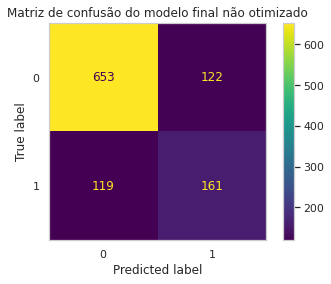

In [ ]:
# Mostrar a matriz de confusão
cm_nao_otimizado = confusion_matrix(y_test_enc, y_pred_final_nao_otimizado)

cm_disp = ConfusionMatrixDisplay(cm_nao_otimizado, display_labels=RF_final_nao_otimizado.classes_)

cm_disp.plot()

plt.title('Matriz de confusão do modelo final não otimizado')
plt.grid(False)

plt.show()

In [ ]:
print(classification_report(y_test_enc, y_pred_final_nao_otimizado, output_dict=False))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       775
           1       0.57      0.57      0.57       280

    accuracy                           0.77      1055
   macro avg       0.71      0.71      0.71      1055
weighted avg       0.77      0.77      0.77      1055



Temos um modelo com uma performance muito parecida com os modelos avaliados durantes as etapas de validação. O modelo final tem uma acurácia de 0.77, F1-Score de macro de 0.71, Precision de macro de 0.71 e recall macro de 0.71.

**Otimizado**

In [ ]:
RF_final_otimizado = RandomForestClassifier(bootstrap=False,
                            criterion='entropy',
                            max_depth=15,
                            min_samples_split=2,
                            n_estimators=75,
                            min_samples_leaf=2)

In [ ]:
RF_final_otimizado.fit(X_train_ros_best, y_train_ros_best)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       min_samples_leaf=2, n_estimators=75)

In [ ]:
RF_final_otimizado.score(X_test_enc_best, y_test_enc)

0.771563981042654

In [ ]:
y_pred_final = RF_final_otimizado.predict(X_test_enc_best)

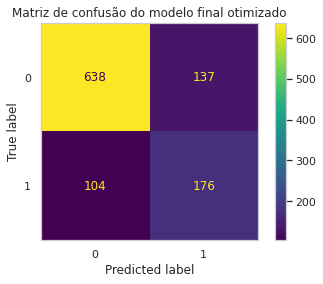

In [ ]:
# Mostrar a matriz de confusão
cm = confusion_matrix(y_test_enc, y_pred_final)

cm_disp = ConfusionMatrixDisplay(cm, display_labels=RF_final_otimizado.classes_)

cm_disp.plot()

plt.title('Matriz de confusão do modelo final otimizado')
plt.grid(False)

plt.show()

In [ ]:
print(classification_report(y_test_enc, y_pred_final, output_dict=False))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       775
           1       0.56      0.63      0.59       280

    accuracy                           0.77      1055
   macro avg       0.71      0.73      0.72      1055
weighted avg       0.78      0.77      0.78      1055



**O modelo otimizado teve uma mesma acurácia de 0.77, porém um recall maior de 0.72 e precision macro de 0.71. Logo irei escolher o modelo otimizado como melhor opção e salvar as suas configurações.**

-------------

### Parte extra para salvamento de arquivos

Irei salvar o modelo final e os encodings com joblib

In [ ]:
from joblib import dump, load

In [ ]:
# Salvando o modelo final
dump(RF_final_otimizado, 'RF_final_model_Alura.joblib') 

['RF_final_model_Alura.joblib']

In [ ]:
# Salvando o X_encoder
dump(X_enc, 'X_enc_model_Alura.joblib')

['X_enc_model_Alura.joblib']

In [ ]:
# Salvando o y_encoder
dump(lb, 'lb_enc_model_Alura.joblib')

['lb_enc_model_Alura.joblib']

In [ ]:
# Salvando o k_best selector
dump(k_best, 'k_best_model_Alura.joblib')

['k_best_model_Alura.joblib']

In [ ]:
# Testando o carregamento do k_best selector para ver se está tudo ok para baixar os arquivos e finalizar a execução. :)
k_best_loaded = load('/content/k_best_model_Alura.joblib')

In [ ]:
k_best_loaded.get_feature_names_out()

array(['InternetService_Fiber optic', 'OnlineSecurity_No',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'DeviceProtection_No internet service', 'TechSupport_No',
       'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check', 'Tenure',
       'Charges_Monthly', 'Charges_Total'], dtype=object)